For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
%config Completer.use_jedi=False

<Figure size 1200x480 with 0 Axes>

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X=np.linspace(0,20,1000)
y= -1*X+2

#### Plot your data points. 

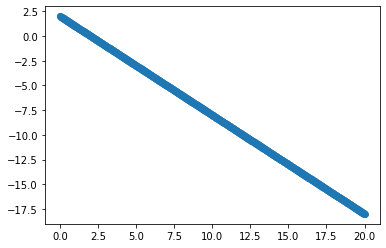

In [3]:
plt.plot(X,y)
plt.scatter(X,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

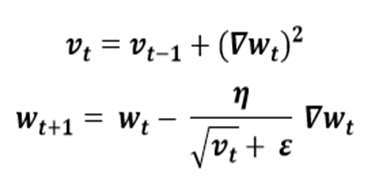

In [4]:
def Adagrad(X,y,MaxEpochs,epsilon,alpha,errorCritria,gradCritria):
    loss=[]
    thetasL0=[]
    thetasL1=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0
    v=0
    while epoch < MaxEpochs:
        count+=1
        yPredict= x@thetas
        
        MSEold=(np.sum((yPredict-y)**2))/(2*m)
        
        Grad= (np.transpose(x)@(yPredict-y))/m
        
        v= v + (Grad)**2
        LR= ((alpha)/((v**0.5)+epsilon))
        thetas= thetas - LR*Grad
        thetasL0.append(thetas[0])
        thetasL1.append(thetas[1])
        
        yPredict= x@thetas
        

        MSEnew=(np.sum((yPredict-y)**2))/(2*m)
        
        loss.append(MSEnew)
        yPredict_Epochs.append(yPredict)
        if abs(MSEold-MSEnew)< errorCritria and round(np.linalg.norm(Grad,2),5) < gradCritria :
            print(f"Convergence occure at {count} iterations")
            print("Gradient Norm: ",np.linalg.norm(Grad,2))
            print("Error Difference: ",abs(MSEold-MSEnew))
            return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs
        
        epoch+=1
    print("Gradient Norm: ",np.linalg.norm(Grad,2))
    print("Error Difference: ",abs(MSEold-MSEnew))
    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs

#### Try different values of the huperparameters and see the differnce in your results.

In [5]:
print("First Trail with Learning Rate = 0.001 \n")
S1,ths1,yP1,loss1,th1_1,th0_1,yP_Epochs1=Adagrad(X,y,1000,1e-8,0.001,0.001,0.0001)
print("First Trail Score: ", S1)
print("------------"*21)
print("Second Trail with Learning Rate = 0.01 \n")
S2,ths2,yP2,loss2,th1_2,th0_2,yP_Epochs2=Adagrad(X,y,1000,1e-8,0.01,0.001,0.0001)
print("Second Trail Score: ", S2)
print("------------"*21)
print("Third Trail with Learning Rate = 0.1 \n")
S3,ths3,yP3,loss3,th1_3,th0_3,yP_Epochs3=Adagrad(X,y,1000,1e-8,0.1,0.001,0.0001)
print("Third Trail Score: ", S3)
print("------------"*21)
print("Fourth Trail with Learning Rate = 0.2 \n")
S4,ths4,yP4,loss4,th1_4,th0_4,yP_Epochs4=Adagrad(X,y,1000,1e-8,0.2,0.001,0.0001)
print("Fourth Trail Score: ", S4)
print("------------"*21)
print("Fifth Trail with Learning Rate = 0.6 \n")
S5,ths5,yP5,loss5,th1_5,th0_5,yP_Epochs5=Adagrad(X,y,1000,1e-8,0.6,0.001,0.0001)
print("Fifth Trail Score: ", S5)

First Trail with Learning Rate = 0.001 

Gradient Norm:  104.92251414332308
Error Difference:  0.0034429542228266996
We Reach 1000 iterations
First Trail Score:  -1.4903511999943952
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Second Trail with Learning Rate = 0.01 

Gradient Norm:  40.30459210910554
Error Difference:  0.008339594184884724
We Reach 1000 iterations
Second Trail Score:  0.590474271523411
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Third Trail with Learning Rate = 0.1 

Gradient Norm:  0.3213753276349225
Error Difference:  0.0002408505218894491
We Reach 1000 iter

### Plot loss vs. epochs

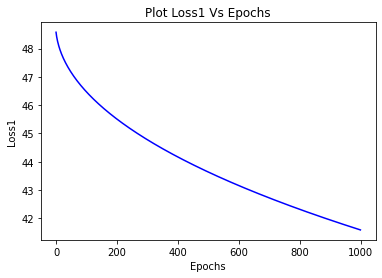

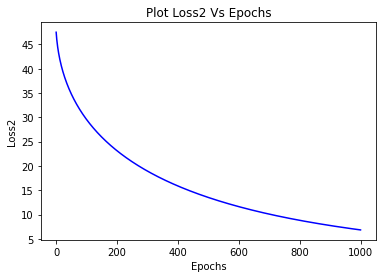

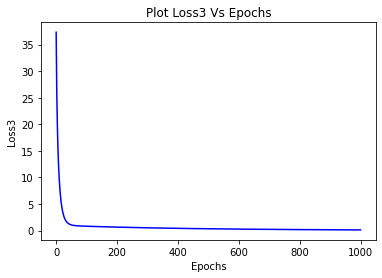

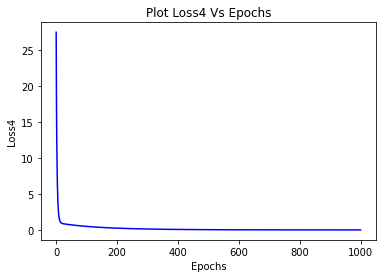

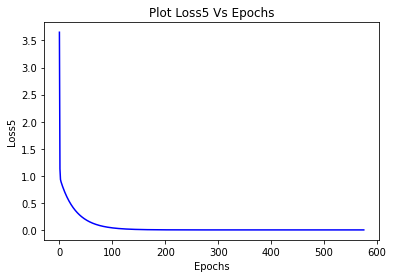

In [6]:
plt.plot(loss1 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss1')
plt.title("Plot Loss1 Vs Epochs")
plt.show()
plt.plot(loss2 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss2')
plt.title("Plot Loss2 Vs Epochs")
plt.show()
plt.plot(loss3 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss3')
plt.title("Plot Loss3 Vs Epochs")
plt.show()
plt.plot(loss4 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss4')
plt.title("Plot Loss4 Vs Epochs")
plt.show()
plt.plot(loss5 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss5')
plt.title("Plot Loss5 Vs Epochs")
plt.show()

### Plot The Best Regression Line

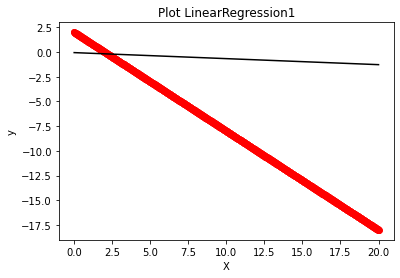

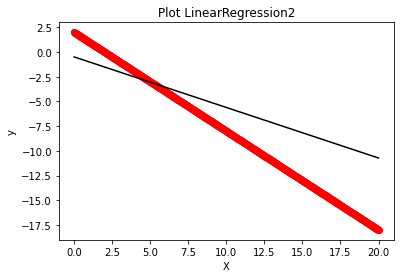

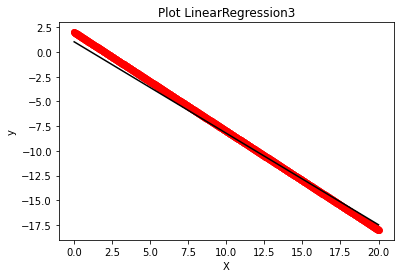

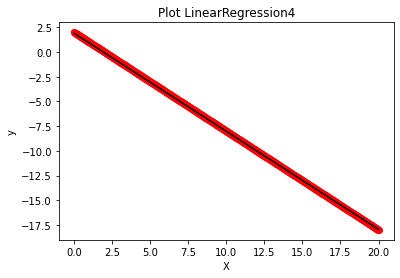

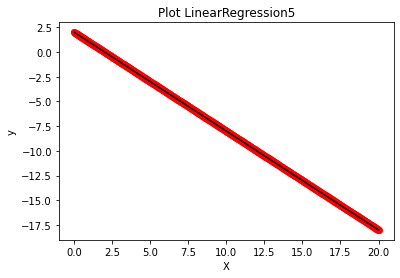

In [7]:
plt.scatter(X,y, color = 'red')
plt.plot(X,yP1 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression1")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP2 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression2")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP3 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression3")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP4 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression4")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP5 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression5")
plt.show()

### Using The Best HyperParameter with Learning Rate = 0.6

In [8]:
Score,thetas,yP,loss,thetasL1,thetasL0,yPredict_Epochs=Adagrad(X,y,1000,1e-8,0.6,0.001,0.0001)

Convergence occure at 576 iterations
Gradient Norm:  9.483961663933629e-05
Error Difference:  3.2143975313333907e-10


### Calculate r2 score

In [9]:
Score

0.9999999994059371

### Check The thetas

In [10]:
thetas

array([[ 1.99971873],
       [-0.99997842]])

### Plot loss vs. epochs

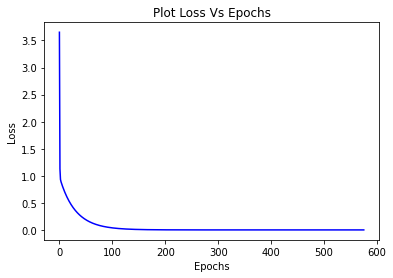

In [11]:
plt.plot(loss , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

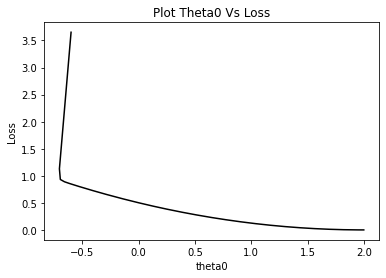

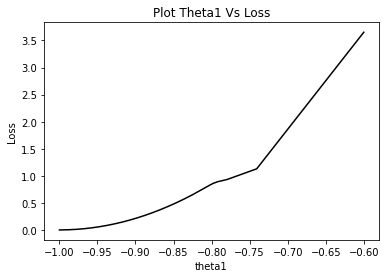

In [12]:
plt.plot(thetasL0 ,loss,color = 'black')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()
plt.plot(thetasL1 ,loss,color = 'black')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

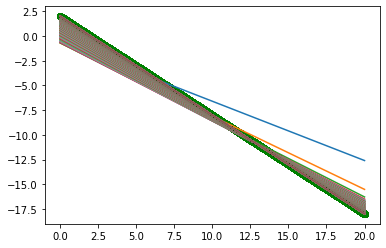

In [13]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

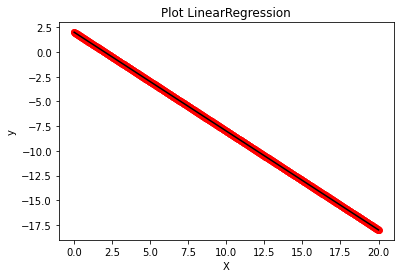

In [14]:
plt.scatter(X,y, color = 'red')
plt.plot(X,yP , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

______________________________________________________________________________

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

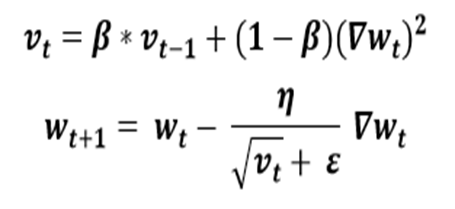

In [15]:
def RMSProp(X,y,MaxEpochs,epsilon,B,alpha,errorCritria,gradCritria):
    loss=[]
    thetasL0=[]
    thetasL1=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=0
    v=0
    while epoch < MaxEpochs:
        count+=1
        yPredict= x@thetas
        
        MSEold=(np.sum((yPredict-y)**2))/(2*m)
        
        Grad= (np.transpose(x)@(yPredict-y))/m
        
        v= B*v + (1-B)*((Grad)**2)
        LR= ((alpha)/((v**0.5)+epsilon))
        thetas= thetas - LR*Grad
        thetasL0.append(thetas[0])
        thetasL1.append(thetas[1])
        
        yPredict= x@thetas
        

        MSEnew=(np.sum((yPredict-y)**2))/(2*m)
        
        loss.append(MSEnew)
        yPredict_Epochs.append(yPredict)
        if abs(MSEold-MSEnew)< errorCritria and round(np.linalg.norm(Grad,2),5) < gradCritria :
            print(f"Convergence occure at {count} iterations")
            print("Gradient Norm: ",np.linalg.norm(Grad,2))
            print("Error Difference: ",abs(MSEold-MSEnew))
            return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs
        
        epoch+=1
        
    print("Gradient Norm: ",np.linalg.norm(Grad,2))
    print("Error Difference: ",abs(MSEold-MSEnew))
    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs

#### Try different values of the huperparameters and see the differnce in your results.

In [16]:
print("First Trail with Learning Rate = 0.0001 and β=0.9 \n")
S1,ths1,yP1,loss1,th1_1,th0_1,yP_Epochs1=RMSProp(X,y,1000,1e-8,0.9,0.0001,0.001,0.0001)
print("First Trail Score: ", S1)
print("------------"*21)
print("Second Trail with Learning Rate = 0.001 and β=0.8 \n")
S2,ths2,yP2,loss2,th1_2,th0_2,yP_Epochs2=RMSProp(X,y,1000,1e-8,0.8,0.001,0.001,0.0001)
print("Second Trail Score: ", S2)
print("------------"*21)
print("Third Trail with Learning Rate = 0.001 and β=0.99  \n")
S3,ths3,yP3,loss3,th1_3,th0_3,yP_Epochs3=RMSProp(X,y,1000,1e-8,0.99,0.001,0.001,0.0001)
print("Third Trail Score: ", S3)
print("------------"*21)
print("Fourth Trail with Learning Rate = 0.0001 and β=0.99 \n")
S4,ths4,yP4,loss4,th1_4,th0_4,yP_Epochs4=RMSProp(X,y,1000,1e-8,0.99,0.00001,0.001,0.0001)
print("Fourth Trail Score: ", S4)
print("------------"*21)
print("Fifth Trail with Learning Rate = 0.01 and β=0.99 \n")
S5,ths5,yP5,loss5,th1_5,th0_5,yP_Epochs5=RMSProp(X,y,1000,1e-8,0.99,0.01,0.001,0.0001)
print("Fifth Trail Score: ", S5)

First Trail with Learning Rate = 0.0001 and β=0.9 

Gradient Norm:  99.20044040553258
Error Difference:  0.010570669657319343
We Reach 1000 iterations
First Trail Score:  -1.2304193819178
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Second Trail with Learning Rate = 0.001 and β=0.8 

Gradient Norm:  0.6112503389415451
Error Difference:  0.0006124048752160771
We Reach 1000 iterations
Second Trail Score:  0.9551902185586963
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Third Trail with Learning Rate = 0.001 and β=0.99  

Gradient Norm:  1.6229166476901862
Error Difference:  0.0008

### Plot loss vs. epochs

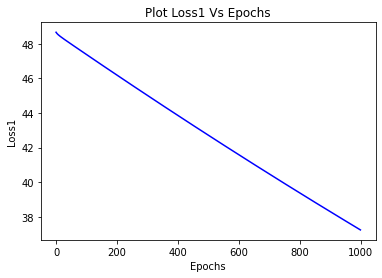

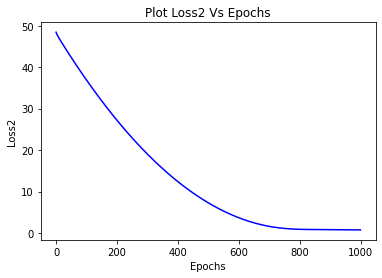

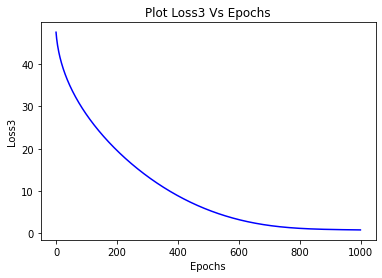

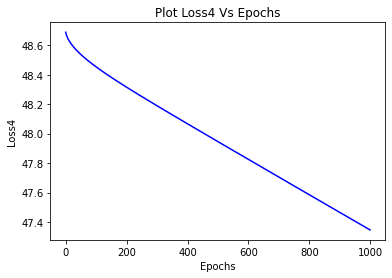

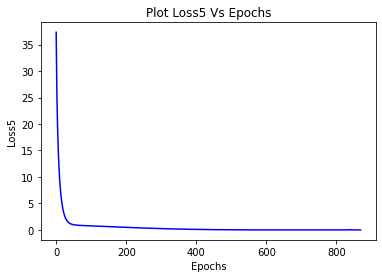

In [17]:
plt.plot(loss1 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss1')
plt.title("Plot Loss1 Vs Epochs")
plt.show()
plt.plot(loss2 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss2')
plt.title("Plot Loss2 Vs Epochs")
plt.show()
plt.plot(loss3 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss3')
plt.title("Plot Loss3 Vs Epochs")
plt.show()
plt.plot(loss4 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss4')
plt.title("Plot Loss4 Vs Epochs")
plt.show()
plt.plot(loss5 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss5')
plt.title("Plot Loss5 Vs Epochs")
plt.show()

### Plot The Best Regression Line

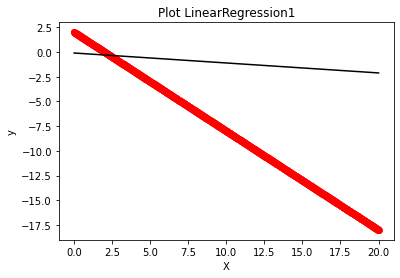

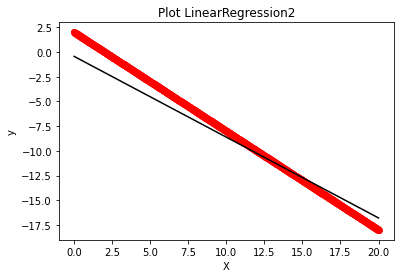

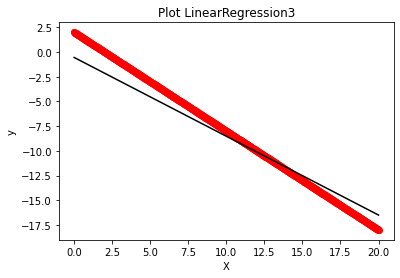

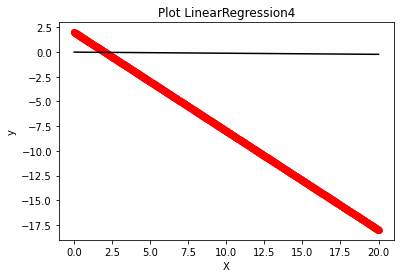

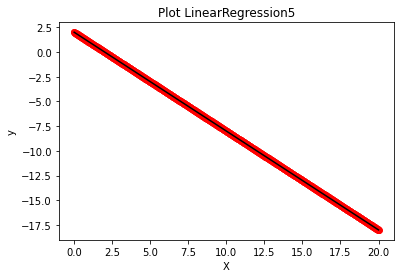

In [18]:
plt.scatter(X,y, color = 'red')
plt.plot(X,yP1 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression1")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP2 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression2")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP3 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression3")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP4 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression4")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP5 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression5")
plt.show()

### Using The Best HyperParameter with Learning Rate = 0.01 and β=0.99.

In [19]:
Score,thetas,yP,loss,thetasL1,thetasL0,yPredict_Epochs=RMSProp(X,y,1000,1e-8,0.99,0.01,0.001,0.0001)

Convergence occure at 870 iterations
Gradient Norm:  7.589300550716674e-05
Error Difference:  8.075186595207404e-12


### Calculate r2 score

In [20]:
Score

0.9999999999991465

### Check The thetas

In [21]:
thetas

array([[ 2.00000176],
       [-1.00000059]])

### Plot loss vs. epochs

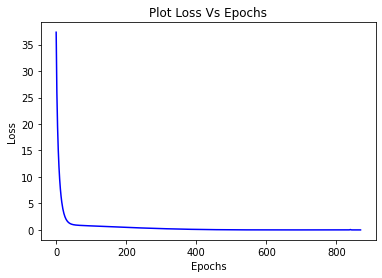

In [22]:
plt.plot(loss , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

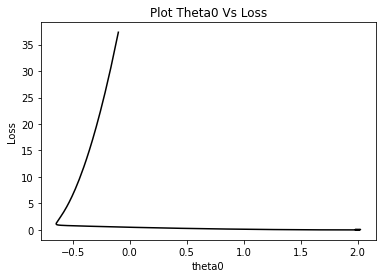

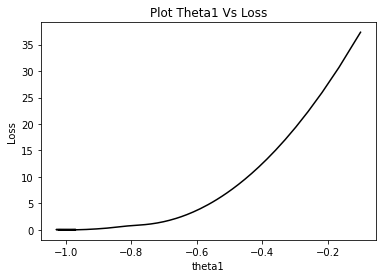

In [23]:
plt.plot(thetasL0 ,loss,color = 'black')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()
plt.plot(thetasL1 ,loss,color = 'black')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

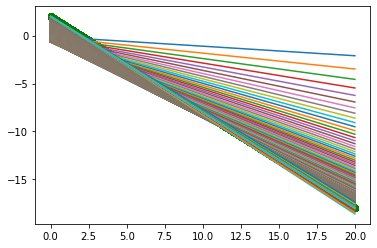

In [24]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

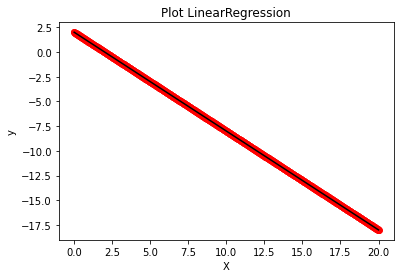

In [25]:
plt.scatter(X,y, color = 'red')
plt.plot(X,yP , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

______________________________________________

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

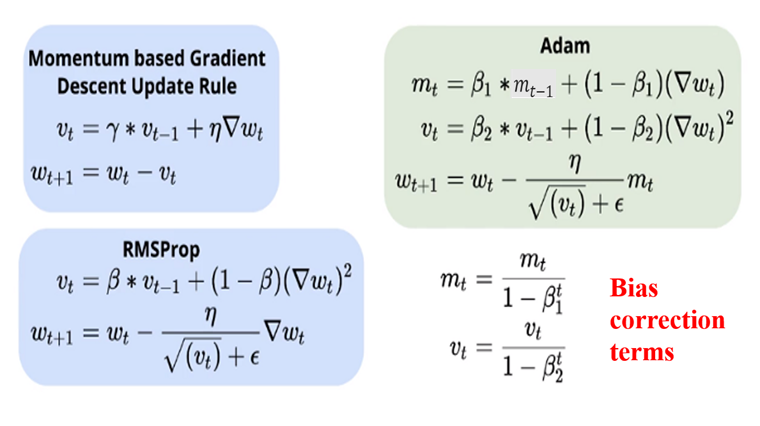

In [26]:
def Adam(X,y,MaxEpochs,epsilon,B1,B2,alpha,errorCritria,gradCritria):
    loss=[]
    thetasL0=[]
    thetasL1=[]
    yPredict_Epochs=[]
    x=np.column_stack((np.ones(len(X),dtype=int), X))
    y= y.reshape(-1,1)
    m=(x.shape)[0]
    thetas=np.zeros((x.shape[1],1))
    count=0
    epoch=1
    vt=0
    mt=0
    while epoch < MaxEpochs+1:
        count+=1
        yPredict= x@thetas
        
        MSEold=(np.sum((yPredict-y)**2))/(2*m)
        
        Grad= (np.transpose(x)@(yPredict-y))/m
        
        mt= B1*mt + (1-B1)*(Grad)
        vt= B2*vt + (1-B2)*((Grad)**2)
        
        mt=mt/(1-(B1**epoch))
        vt=vt/(1-(B2**epoch))
        
        LR= (alpha)/(((vt**0.5)+epsilon))
        
        thetas= thetas - LR*mt
        thetasL0.append(thetas[0])
        thetasL1.append(thetas[1])
        
        yPredict= x@thetas
        

        MSEnew=(np.sum((yPredict-y)**2))/(2*m)
        
        loss.append(MSEnew)
        yPredict_Epochs.append(yPredict)
        if abs(MSEold-MSEnew)< errorCritria and round(np.linalg.norm(Grad,2),5) < gradCritria :
            print(f"Convergence occure at {count} iterations")
            print("Gradient Norm: ",np.linalg.norm(Grad,2))
            print("Error Difference: ",abs(MSEold-MSEnew))
            return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs
        
        epoch+=1
    print("Gradient Norm: ",np.linalg.norm(Grad,2))
    print("Error Difference: ",abs(MSEold-MSEnew))
    print(f"We Reach {MaxEpochs} iterations")
    return r2_score(y,yPredict), thetas, yPredict,loss,thetasL1,thetasL0,yPredict_Epochs

#### Try different values of the huperparameters and see the differnce in your results.

In [27]:
print("First Trail with Learning Rate = 0.0001 and β1=0.9, β2=0.99 \n")
S1,ths1,yP1,loss1,th1_1,th0_1,yP_Epochs1=Adam(X,y,1000,1e-8,0.9,0.99,0.0001,0.001,0.0001)
print("First Trail Score: ", S1)
print("------------"*21)
print("Second Trail with Learning Rate = 0.0001 and β1=0.8, β2=0.9 \n")
S2,ths2,yP2,loss2,th1_2,th0_2,yP_Epochs2=Adam(X,y,1000,1e-8,0.8,0.9,0.0001,0.001,0.0001)
print("Second Trail Score: ", S2)
print("------------"*21)
print("Third Trail with Learning Rate = 0.001 and β1=0.8, β2=0.99 \n")
S3,ths3,yP3,loss3,th1_3,th0_3,yP_Epochs3=Adam(X,y,1000,1e-8,0.8,0.99,0.001,0.001,0.0001)
print("Third Trail Score: ", S3)
print("------------"*21)
print("Fourth Trail with Learning Rate = 0.01 and β1=0.9, β2=0.9 \n")
S4,ths4,yP4,loss4,th1_4,th0_4,yP_Epochs4=Adam(X,y,1000,1e-8,0.9,0.9,0.01,0.001,0.0001)
print("Fourth Trail Score: ", S4)
print("------------"*21)
print("Fifth Trail with Learning Rate = 0.01 and β1=0.7, β2=0.8 and 3000 Iterations \n")
S5,ths5,yP5,loss5,th1_5,th0_5,yP_Epochs5=Adam(X,y,3000,1e-8,0.4,0.7,0.08,0.01,0.0001)
print("Fifth Trail Score: ", S5)
print("------------"*21)
print("Sixth Trail with Learning Rate = 0.01 and β1=0.7, β2=0.88 and 2000 Iterations \n")
S6,ths6,yP6,loss6,th1_6,th0_6,yP_Epochs6=Adam(X,y,2000,1e-8,0.7,0.88,0.01,0.001,0.0001)
print("Sixth Trail Score: ", S6)

First Trail with Learning Rate = 0.0001 and β1=0.9, β2=0.99 

Gradient Norm:  113.64430139823264
Error Difference:  0.0
We Reach 1000 iterations
First Trail Score:  -1.9142635287657437
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Second Trail with Learning Rate = 0.0001 and β1=0.8, β2=0.9 

Gradient Norm:  100.57555782936078
Error Difference:  0.010724453846869153
We Reach 1000 iterations
Second Trail Score:  -1.291438624510267
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Third Trail with Learning Rate = 0.001 and β1=0.8, β2=0.99 

Gradient Norm:  113.45749504480595
Error Diffe

### Plot loss vs. epochs

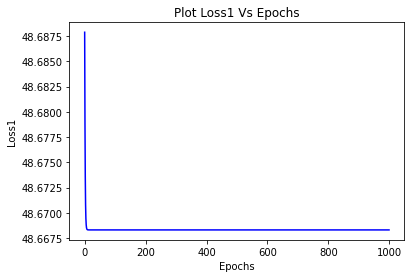

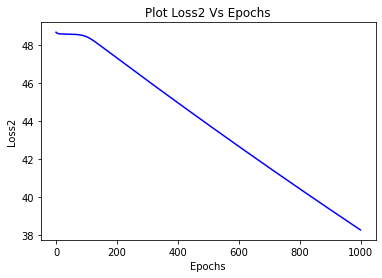

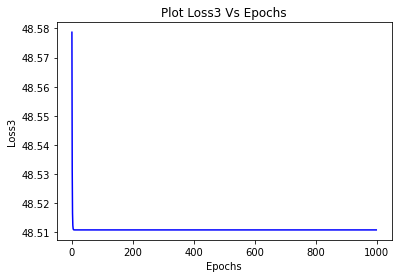

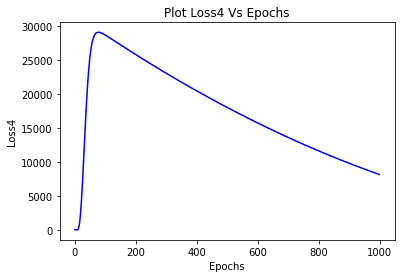

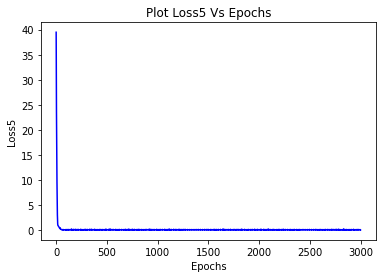

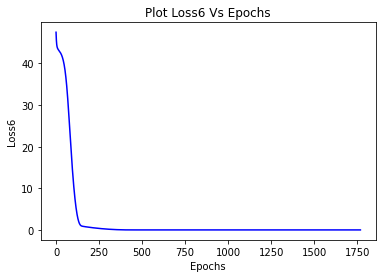

In [28]:
plt.plot(loss1 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss1')
plt.title("Plot Loss1 Vs Epochs")
plt.show()
plt.plot(loss2 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss2')
plt.title("Plot Loss2 Vs Epochs")
plt.show()
plt.plot(loss3 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss3')
plt.title("Plot Loss3 Vs Epochs")
plt.show()
plt.plot(loss4 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss4')
plt.title("Plot Loss4 Vs Epochs")
plt.show()
plt.plot(loss5 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss5')
plt.title("Plot Loss5 Vs Epochs")
plt.show()
plt.plot(loss6 , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss6')
plt.title("Plot Loss6 Vs Epochs")
plt.show()

### Plot The Best Regression Line

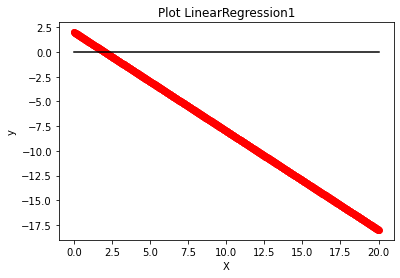

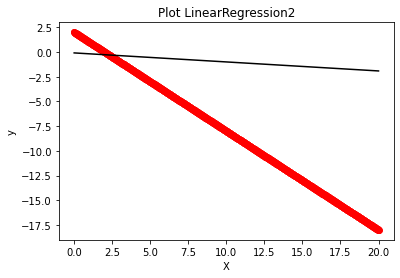

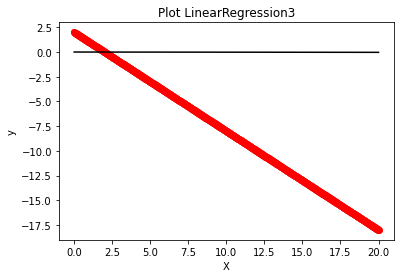

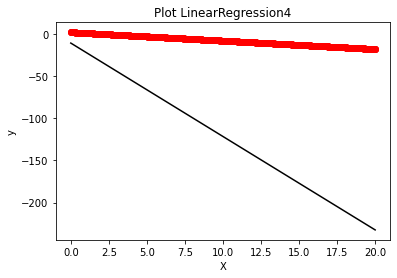

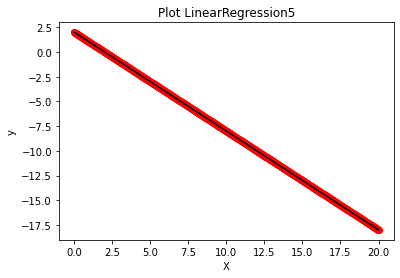

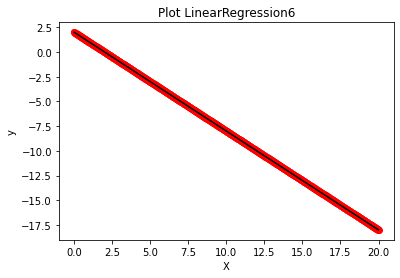

In [29]:
plt.scatter(X,y, color = 'red')
plt.plot(X,yP1 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression1")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP2 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression2")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP3 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression3")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP4 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression4")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP5 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression5")
plt.show()
plt.scatter(X,y, color = 'red')
plt.plot(X,yP6 , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression6")
plt.show()

### Using The Best HyperParameter with Learning Rate = 0.01 and β1=0.7 and β2=0.8. .

In [30]:
Score,thetas,yP,loss,thetasL1,thetasL0,yPredict_Epochs=Adam(X,y,2000,1e-8,0.7,0.88,0.01,0.001,0.0001)

Convergence occure at 1769 iterations
Gradient Norm:  9.49037558470144e-05
Error Difference:  8.067661153718899e-07


### Calculate r2 score

In [31]:
Score

0.9999999516887355

### Check The thetas

In [32]:
thetas

array([[ 2.00010223],
       [-0.99989777]])

### Plot loss vs. epochs

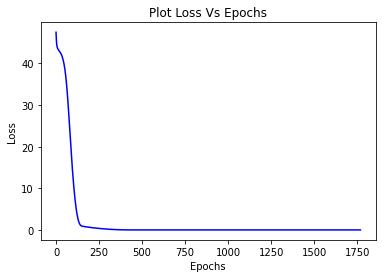

In [33]:
plt.plot(loss , color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Plot Loss Vs Epochs")
plt.show()

### Plot Theta_0 vs. loss and Theta_1 vs. loss

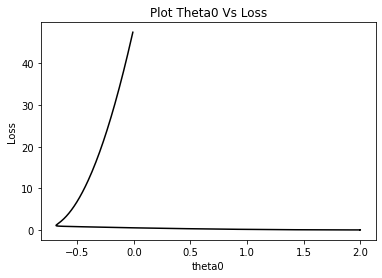

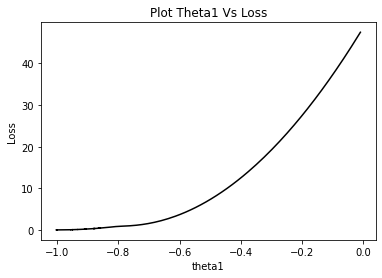

In [34]:
plt.plot(thetasL0 ,loss,color = 'black')
plt.xlabel('theta0')
plt.ylabel('Loss')
plt.title("Plot Theta0 Vs Loss")
plt.show()
plt.plot(thetasL1 ,loss,color = 'black')
plt.xlabel('theta1')
plt.ylabel('Loss')
plt.title("Plot Theta1 Vs Loss")
plt.show()

### Plot all regression lines till converge

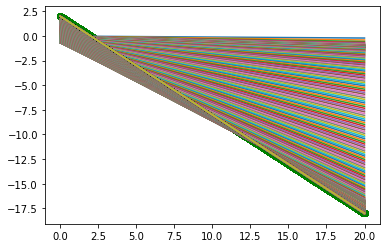

In [35]:
for p in yPredict_Epochs:
    plt.scatter(X,y, color = 'green')
    plt.plot(X, p)
plt.show()

### Plot The Best Regression Line

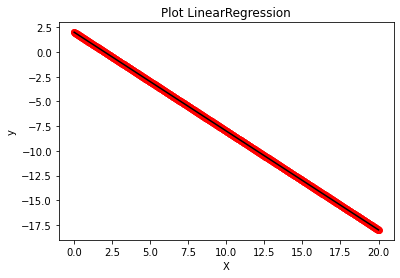

In [36]:
plt.scatter(X,y, color = 'red')
plt.plot(X,yP , color = 'black')
plt.xlabel('X')
plt.ylabel('y')
plt.title("Plot LinearRegression")
plt.show()

## Congratulations 
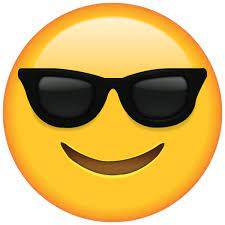

________________________________________________________